# Supervised Learning

## Circle/Ellipsoid/Rectangle Classifier

In [1]:
import numpy as np
import pandas as pd
import math
import random

In [2]:
random.seed(0)

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression


### Generate Data

In [3]:
# function to generate data points for family car example
# the dataset contain car price and engine power and car class (family car:[0,1])

def generateCarTypeData(gnPoints):
    
    engine_power_all = []
    price_all = []
    famCar_class = []

    for i in range(gnPoints):
        rnd_val = np.random.random()
        rnd_val_e = np.random.random()
        rnd_val_p = np.random.random()
        if(rnd_val < 0.5):
            famCar_class.append(0)
            tmp_eng_power = np.random.randint(low=50, high=240)
            tmp_price = np.random.randint(low=10, high=100)

            while (120<tmp_eng_power<180 and 25<tmp_price<50):
                tmp_eng_power = np.random.randint(low=50, high=240)
                tmp_price = np.random.randint(low=10, high=100)

            engine_power_all.append(tmp_eng_power)
            price_all.append(tmp_price)
        else:
            famCar_class.append(1)
            engine_power_all.append(np.random.randint(low=120, high=180))
            price_all.append(np.random.randint(low=25, high=50))

    tmp_df = pd.DataFrame({
        "e":engine_power_all,
        "p":price_all,
        "c":famCar_class
    })
    
    return tmp_df


In [4]:
my_df = generateCarTypeData(gnPoints=40)
my_df.head()

,e,p,c
0,165,42,1
1,96,63,0
2,121,27,1
3,70,99,0
4,169,43,1


A scatter plot of data points

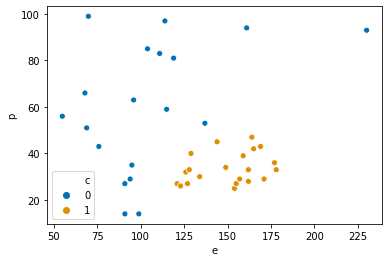

In [5]:
#plot data distribution
sns.scatterplot(x="e", y="p", hue="c", data=my_df, palette="colorblind")

### Implement a function that obtaining the data set boundaries

In [6]:
def getRange_familyCar(gdf):
    
    min_price = gdf[gdf['c']==1]['p'].min()
    max_price = gdf[gdf['c']==1]['p'].max()
    min_engine = gdf[gdf['c']==1]['e'].min()
    max_engine = gdf[gdf['c']==1]['e'].max()
       
    min_price_large = gdf[(gdf['c'] == 0) & (gdf['p'] < min_price)]['p'].max()
    max_price_large = gdf[(gdf['c'] == 0) & (gdf['p'] > max_price)]['p'].min()
    min_engine_large = gdf[(gdf['c'] == 0) & (gdf['e'] < min_engine)]['e'].max()
    max_engine_large = gdf[(gdf['c'] == 0) & (gdf['e'] > max_engine)]['e'].min()
    
    min_price = (min_price + min_price_large) / 2
    max_price = (max_price + max_price_large) / 2
    min_engine = (min_engine + min_engine_large) / 2
    max_engine = (max_engine + max_engine_large) / 2
    
    return min_price, max_price, min_engine, max_engine

In [7]:
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)
print("rectangle",min_p, max_p, min_e, max_e)

rectangle 19.5 49.0 120.0 204.0


### Rectangle Classifier

In [8]:
def classify_instance_byRectangle(min_price, max_price, min_engine, max_engine, gdf_instance):
    if(min_engine<gdf_instance.e<max_engine and min_price<gdf_instance.p<max_price):
        return 1
    else:
        return 0

### Circle Classifier

In [9]:
def classify_instance_byCircle(min_price, max_price, min_engine, max_engine, gdf_instance):
    ycenter = (min_price + max_price) / 2
    xcenter = (min_engine + max_engine) / 2
    r = math.sqrt(math.pow((max_price - ycenter),2) + math.pow((max_engine - xcenter),2))
    x = gdf_instance['e']
    y = gdf_instance['p']
    
    term  = math.pow((x - xcenter), 2) + math.pow((y - ycenter), 2)
    if math.sqrt(term) <= r :
        return 1
    else:
        return 0

### Ellipsoid Classifier

In [10]:
def classify_instance_byEllipsoid(min_price, max_price, min_engine, max_engine, gdf_instance):
    ycenter = (min_price + max_price) / 2
    xcenter = (min_engine + max_engine) / 2
    rx = math.sqrt(math.pow((max_engine - xcenter),2))
    ry = math.sqrt(math.pow((max_price - ycenter),2))
    x = gdf_instance['e']
    y = gdf_instance['p']
    
    first_term  = math.pow((x - xcenter),2) / math.pow(rx,2) 
    second_term  = math.pow((y - ycenter),2) / math.pow(ry,2) 
    
    if first_term + second_term <= 1:
        return 1
    else:
        return 0

### Generate Test Set

In [11]:
test_df = generateCarTypeData(gnPoints=30) # you might want to try different test set sizes
test_labels = np.array(test_df.c)

accuracy when **rectangle** function is used for classifying the instances in the test set

In [12]:
test_predict = []
for i in range(len(test_df)):
    result = classify_instance_byRectangle(min_p, max_p, min_e, max_e, test_df.iloc[i])
    test_predict.append(result)
    
print(np.array(test_labels))
print(np.array(test_predict))
d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

[1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1]
[1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1]
d_accuracy 0.9


accuracy when **Circle** function is used for classifying the instances in the test set

In [13]:
test_predict = []
for i in range(len(test_df)):
    result = classify_instance_byCircle(min_p, max_p, min_e, max_e, test_df.iloc[i])
    test_predict.append(result)
    
print(np.array(test_labels))
print(np.array(test_predict))
d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

[1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1]
[1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1]
d_accuracy 0.8333


accuracy when **Ellipsoid** function is used for classifying the instances in the test set

In [14]:
min_p, max_p, min_e, max_e = getRange_familyCar(my_df)
test_predict = []
for i in range(len(test_df)):
    result = classify_instance_byEllipsoid(min_p, max_p, min_e, max_e, test_df.iloc[i])
    test_predict.append(result)
    
print(np.array(test_labels))
print(np.array(test_predict))
d_accuracy = round(accuracy_score(test_labels, test_predict), 4)
print("d_accuracy", d_accuracy)

[1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1]
[1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1]
d_accuracy 0.8667
